# **Simple Linear Regression(Salary Hike- Build a prediction model for salary hike)**

### **Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

### **Importing data**

In [ ]:
salary_data=pd.read_csv('/content/Salary_Data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### **Understanding the Data**

In [ ]:
salary_data.shape

(30, 2)

In [ ]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### **Plotting the data to check for outliers**

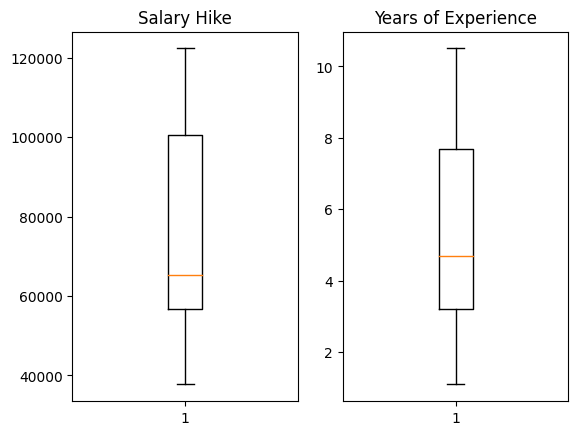

In [ ]:
plt.subplot(121)
plt.boxplot(salary_data['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(salary_data['YearsExperience'])
plt.title('Years of Experience')
plt.show()

**As we can see, there are no outliers in the data.**

### **Checking the Correlation between the Variables**

In [ ]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


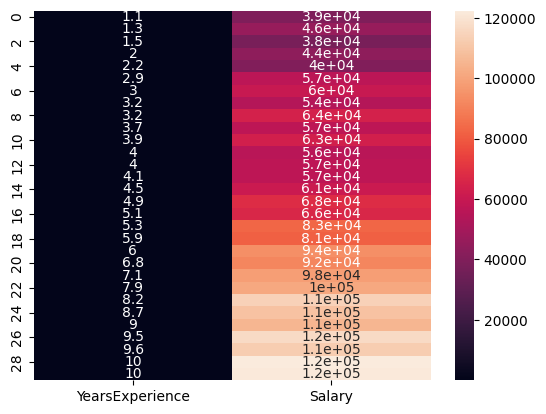

In [ ]:
sns.heatmap(data= salary_data, annot=True)
plt.show()

### **Visualization of Correlation between x and y**

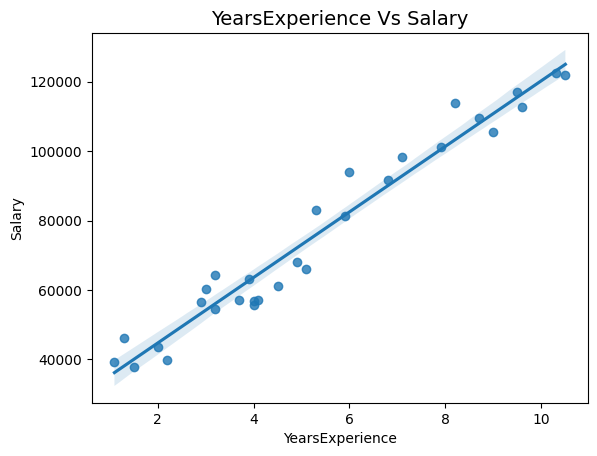

In [ ]:
sns.regplot(x='YearsExperience', y='Salary', data= salary_data)
plt.title('YearsExperience Vs Salary', fontsize = 14)
plt.show()

**We can see above that there is good correlation between the variables x and y**

### **Checking for Homoscedasticity or Hetroscedasticity**

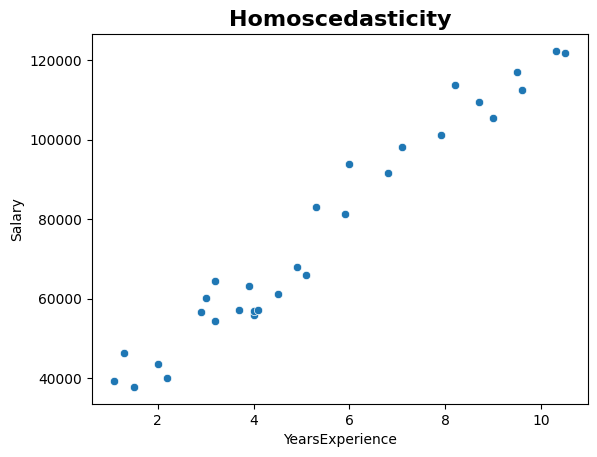

In [ ]:
sns.scatterplot(x ='YearsExperience', y ='Salary', data= salary_data)
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [ ]:
salary_data.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

**As we can see in above graph**


*   It shows as the Salary Increases the Years of Experience increases variation is constant along the way in data
*   The data doesn't have any specific pattern in the variation. hence, we can say it's Homoscedasticity



### **Trying different transformation of data to estimate normal distribution and remove any skewness**

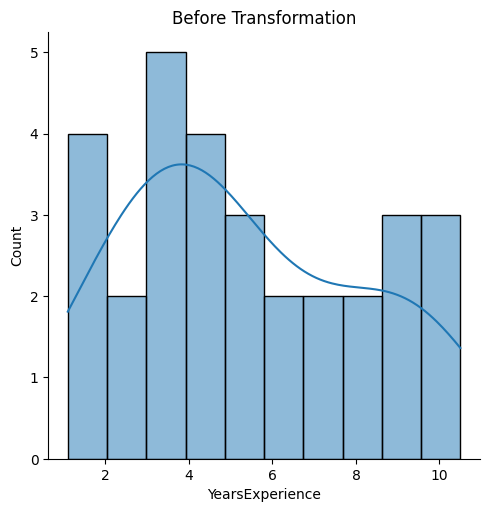

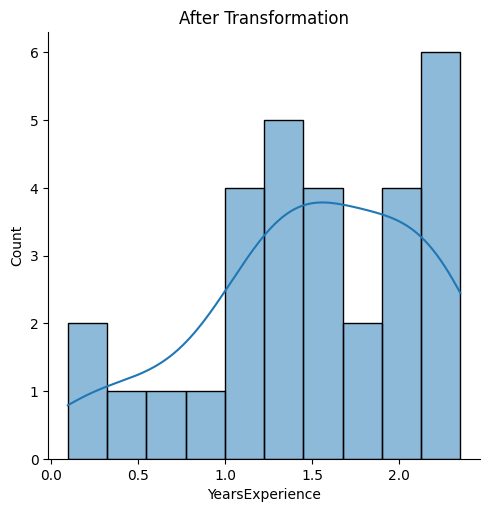

In [ ]:
sns.displot(salary_data['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(salary_data['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

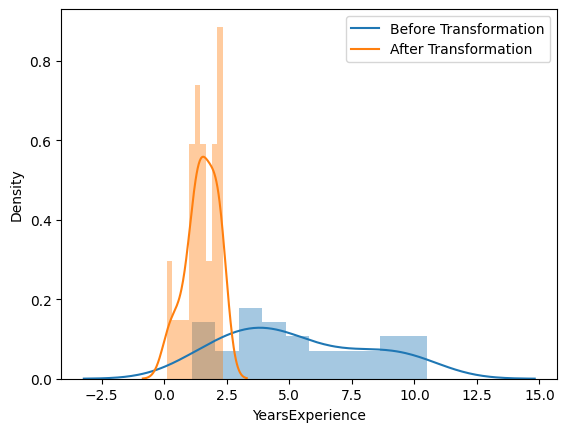

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(salary_data['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(salary_data['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

**As we can see how log transformation affects the data and it scales the values down.**

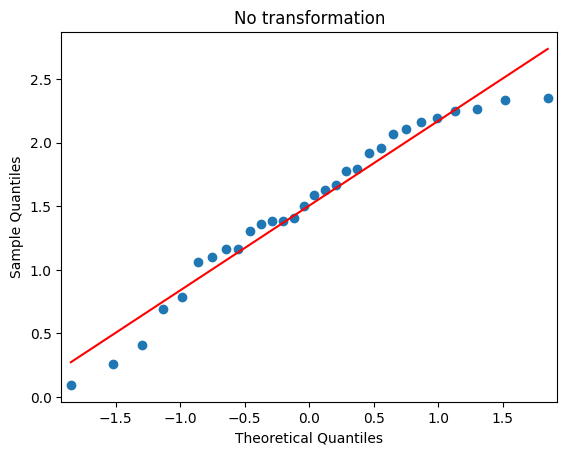

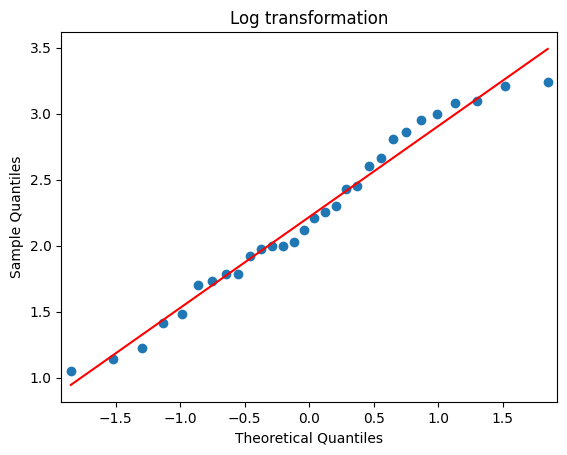

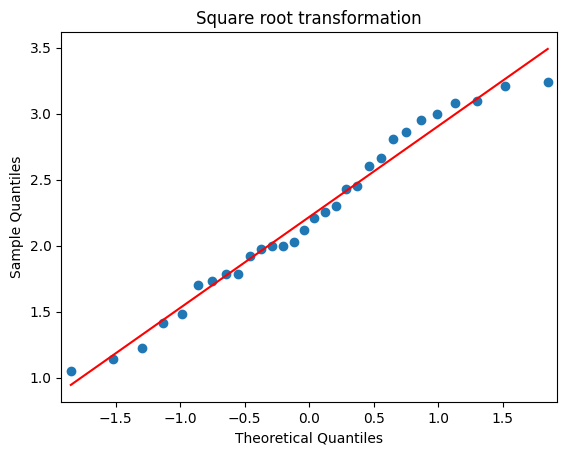

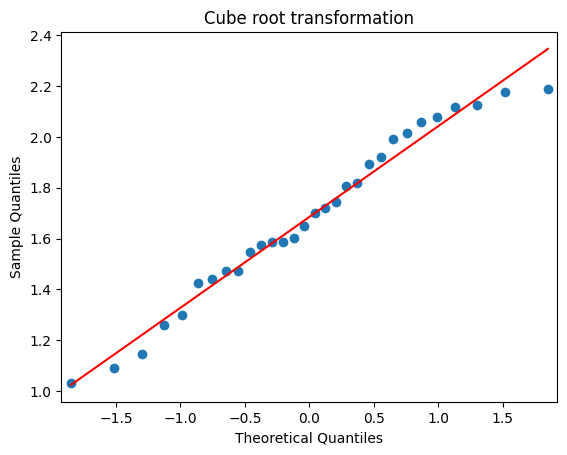

In [ ]:
sm.qqplot(np.log(salary_data['YearsExperience']), line = 'r')
plt.title('No transformation')
sm.qqplot(np.sqrt(salary_data['YearsExperience']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(salary_data['YearsExperience']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(salary_data['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

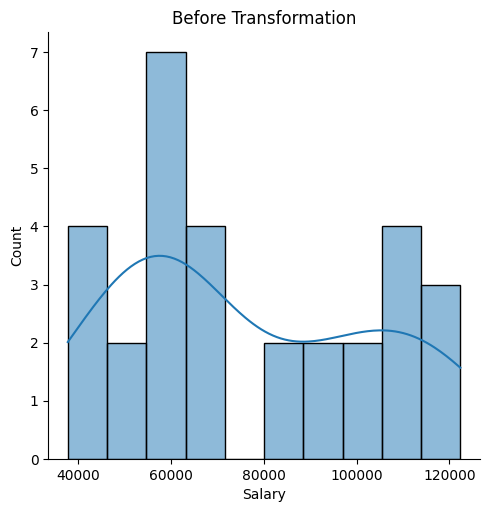

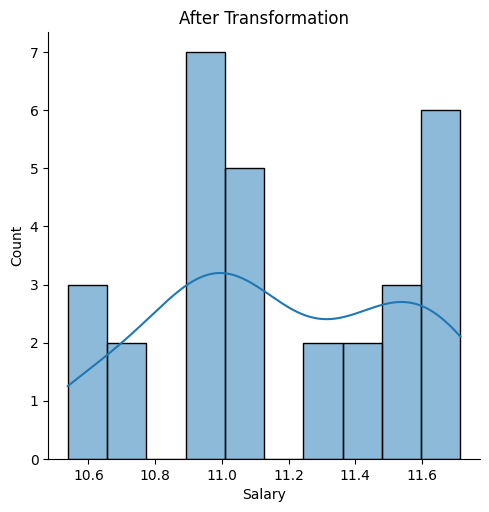

In [ ]:
sns.displot(salary_data['Salary'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(salary_data['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

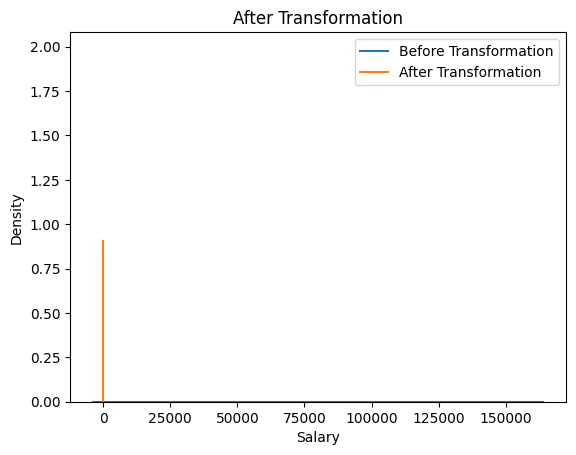

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(salary_data['Salary'], bins = 10, kde = True)
sns.distplot(np.log(salary_data['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.legend(labels)
plt.show()

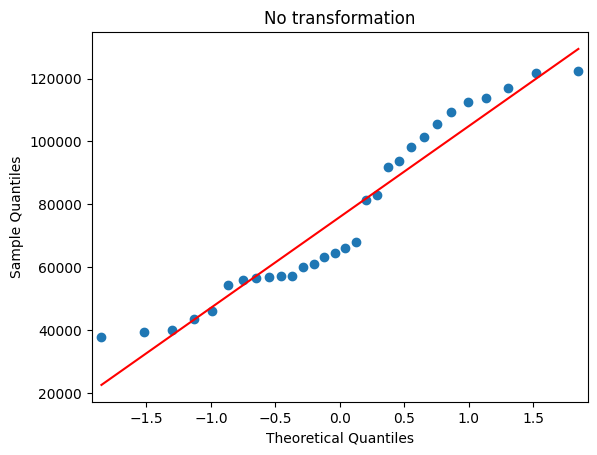

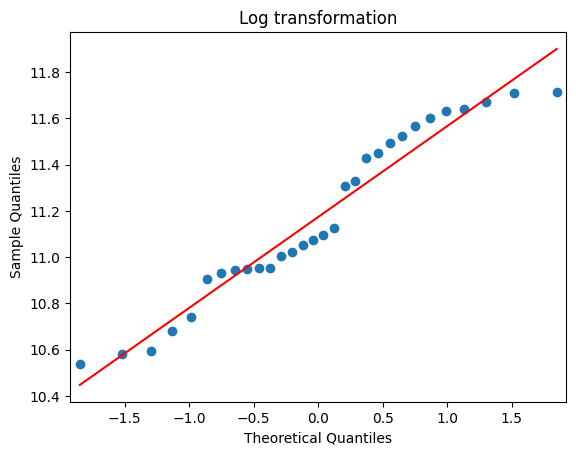

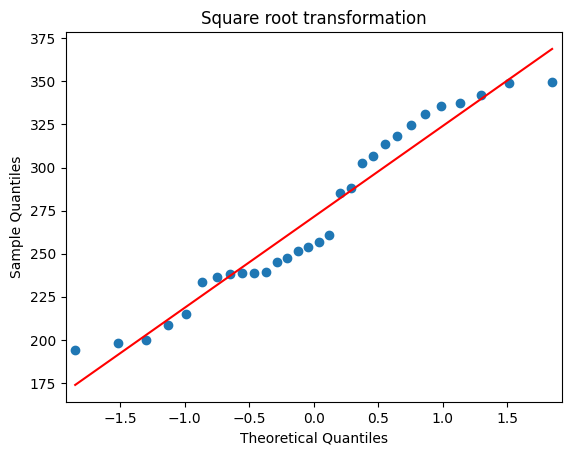

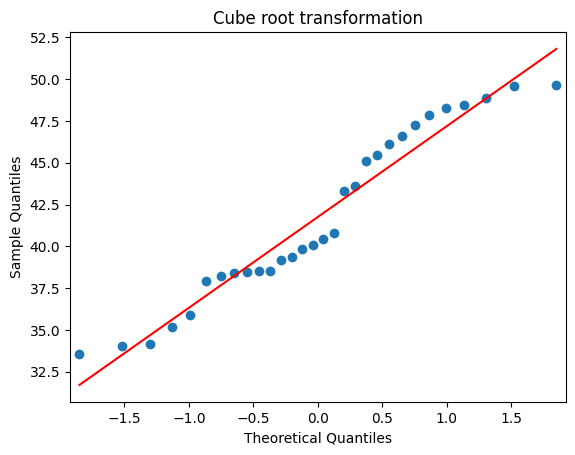

In [ ]:
sm.qqplot(salary_data['Salary'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(salary_data['Salary']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(salary_data['Salary']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(salary_data['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

**We only Perform any data transformation when the data is skewed or not normal distribution N(0,1)**

### **Fitting a Linear Regression Model using Ordinary Least Squares (OLS) Regression**

**It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line**

In [ ]:
linear_model = smf.ols('Salary~YearsExperience', data = salary_data).fit()

In [ ]:
print('R-squared     :',linear_model.rsquared.round(3)) #Overall Contribution of Predictors
print('Adj.R-squared :',linear_model.rsquared_adj.round(3)) #Overall Contribution of Predictors
print('AIC Value     :',linear_model.aic.round(3)) #Error Impurity
print('BIC Value     :',linear_model.bic.round(3)) #Error Impurity

R-squared     : 0.957
Adj.R-squared : 0.955
AIC Value     : 606.882
BIC Value     : 609.685


**As we can notice in the above model**


*   The R-squared and Adjusted R-squared scores are above 0.85. (It is a thumb rule to consider Adjusted R-squared to be greater than 0.85 for a good model for prediction)
*  AIC and BIC score are much higher for this model
*   Lets Try some data transformation to check whether these scores can get any better than this.





### **Square Root transformation on data**

In [ ]:
linear_model1 = smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = salary_data).fit()

In [ ]:
print('R-squared     :',linear_model1.rsquared.round(3))
print('Adj.R-squared :',linear_model1.rsquared_adj.round(3))
print('AIC Value     :',linear_model1.aic.round(3))
print('BIC Value     :',linear_model1.bic.round(3))

R-squared     : 0.942
Adj.R-squared : 0.94
AIC Value     : 237.046
BIC Value     : 239.848


**As we can notice in the above model**
*   The R-squared and Adjusted R-squared scores are above 0.85. but its has gotten less than previous model
*   AIC and BIC score are now much better for this model
*   Lets Try some data transformation to check whether these scores can get any better than this.



### **Cube Root transformation on data**

In [ ]:
linear_model2 = smf.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = salary_data).fit()

In [ ]:
print('R-squared     :',linear_model2.rsquared.round(3))
print('Adj.R-squared :',linear_model2.rsquared_adj.round(3))
print('AIC Value     :',linear_model2.aic.round(3))
print('BIC Value     :',linear_model2.bic.round(3))

R-squared     : 0.932
Adj.R-squared : 0.93
AIC Value     : 105.179
BIC Value     : 107.981


**As we can notice in the above model**


*   After Cube root transformation on the Data, R-squared and Adjusted R-squared scores have decreased but they are above 0.85.
*   Lets Try other data transformation to check whether these scores can get any higher than this.



### **Log transformation on data**

In [ ]:
linear_model3 = smf.ols('np.log(Salary)~np.log(YearsExperience)', data = salary_data).fit()

In [ ]:
print('R-squared     :',linear_model3.rsquared.round(3))
print('Adj.R-squared :',linear_model3.rsquared_adj.round(3))
print('AIC Value     :',linear_model3.aic.round(3))
print('BIC Value     :',linear_model3.bic.round(3))

R-squared     : 0.905
Adj.R-squared : 0.902
AIC Value     : -42.417
BIC Value     : -39.615


**As we can notice in the above model**


*   After log transformation on the data, This Model scored has not good R-squared and Adjusted R-squared scores than the previous model.



### **Model Testing**

As Y = Beta0 + Beta1*(X)

### **Finding Coefficient Parameters (Beta0 and Beta1 values)**

In [ ]:
linear_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

**Here, (Intercept) Beta0 value = 25792.20 & (YearsExperience) Beta1 value = 9449.96**

**Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)**

**Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)**

In [ ]:
print(linear_model.tvalues,'\n',linear_model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


**(Intercept) Beta0: tvalue=11.34 , pvalue=5.511950e-12**

**(daily) Beta1: tvalue=24.95, pvalue= 1.143068e-20**

**As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(YearsExperience) variable has good slope and variance w.r.t Y(Salary) variable.**

**R-squared measures the strength of the relationship between your model and the dependent variable** **on a 0 – 100% scale**.

**Measure goodness-of-fit by finding rsquared** **values (percentage of variance) **

In [ ]:
linear_model.rsquared, linear_model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

**Determination Coefficient = rsquared value = 0.95 ; very good fit >= 85%**

### **Residual Analysis**

### **Test for Normality of Residuals ( Q-Q Plot)**

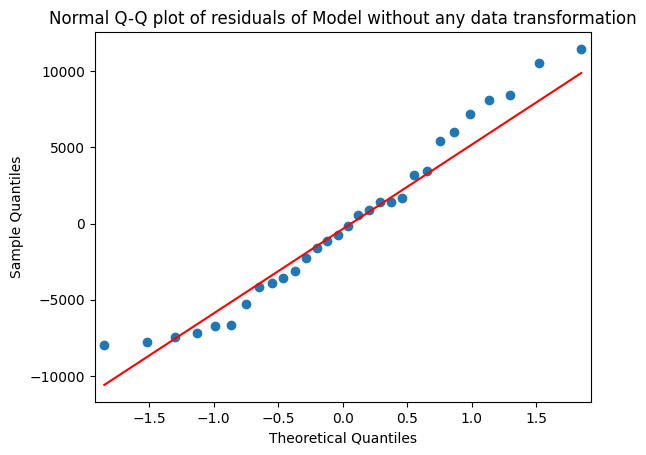

In [ ]:
sm.qqplot(linear_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

**As we can notice in the above plot, the first model follows normal distribution**

### **Residual Plot to check Homoscedasticity or Hetroscedasticity**

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

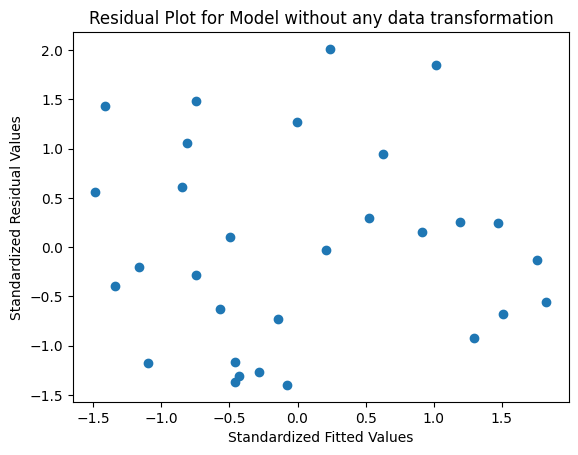

In [ ]:
plt.scatter(get_standardized_values(linear_model.fittedvalues), get_standardized_values(linear_model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

**As we can notice in the above plots**


*  The Model have Homoscedasciticity.
*   The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.
*   Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed





### **Model Validation**

**Comparing different models with respect to the Root Mean Squared Errors**

**We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the** **average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
linear_model1_pred_y =np.square(linear_model1.predict(salary_data['YearsExperience']))
linear_model2_pred_y =pow(linear_model2.predict(salary_data['YearsExperience']),3)
linear_model3_pred_y =np.exp(linear_model3.predict(salary_data['YearsExperience']))

In [ ]:
linear_model1_rmse =np.sqrt(mean_squared_error(salary_data['Salary'], linear_model1_pred_y))
linear_model2_rmse =np.sqrt(mean_squared_error(salary_data['Salary'], linear_model2_pred_y))
linear_model3_rmse =np.sqrt(mean_squared_error(salary_data['Salary'], linear_model3_pred_y))
print('Linear Model =', np.sqrt(linear_model.mse_resid),'\n' 'Linear Model1=', linear_model1_rmse,'\n' 'Linear Model2=', linear_model2_rmse, '\n' 'Linear Model3=', linear_model3_rmse)

Linear Model = 5788.315051119395 
Linear Model1= 5960.647096174318 
Linear Model2= 6232.815455835847 
Linear Model3= 7219.716974372806


In [ ]:
rmse = {'Linear Model': np.sqrt(linear_model.mse_resid), 'Linear Model1': linear_model1_rmse, 'Linear Model2': linear_model3_rmse, 'Linear Model3' : linear_model3_rmse}
min(rmse, key=rmse.get)

'Linear Model'

**As 'Linear Model' has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use 'Linear Model' to predict our values**

**'Linear Model' is that Simple Linear Regression model where we did not perfrom any data transformation and got the highest Adjusted R-squared value**

### **Predicting values**

### **First model results without any transformation**

In [ ]:
predicted = pd.DataFrame()
predicted['YearsExperience'] = salary_data.YearsExperience
predicted['Salary'] = salary_data.Salary
predicted['Predicted_Salary_Hike'] = pd.DataFrame(linear_model.predict(predicted.YearsExperience))
predicted

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
